In [84]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')


from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [85]:
train=pd.read_csv('train.csv')
len(train)

1460

In [86]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train['type']='train'
test['type']='test'
sample=pd.read_csv('sample_submission.csv')
df=pd.concat([train,test])


In [87]:
print(df.info())

print(df.describe())
df.apply(lambda x: x.isnull().sum(axis=0))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
type                0
Length: 82, dtype: int64

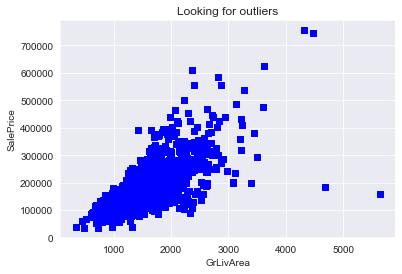

In [88]:


# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
plt.scatter(df.GrLivArea, df.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

#Deleting outliers
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index)


In [89]:
categorical_vars= df.select_dtypes(include=['object']).columns
numerical_vars = df.select_dtypes(exclude=['object']).columns
categorical_vars=categorical_vars.drop(['type'])
#train[categorical_vars].describe().T


In [90]:
categorical_vars

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

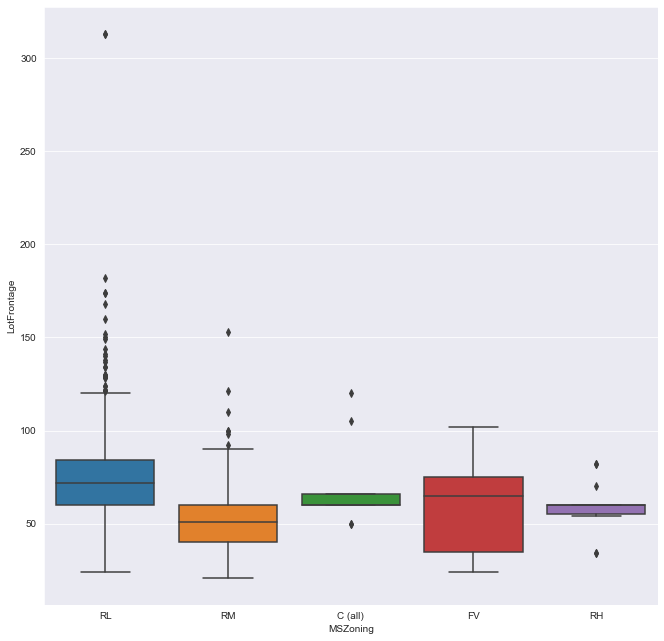

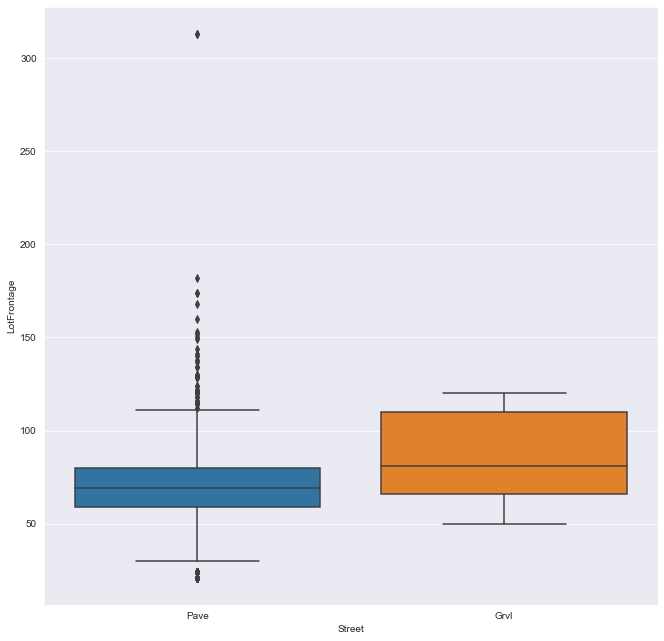

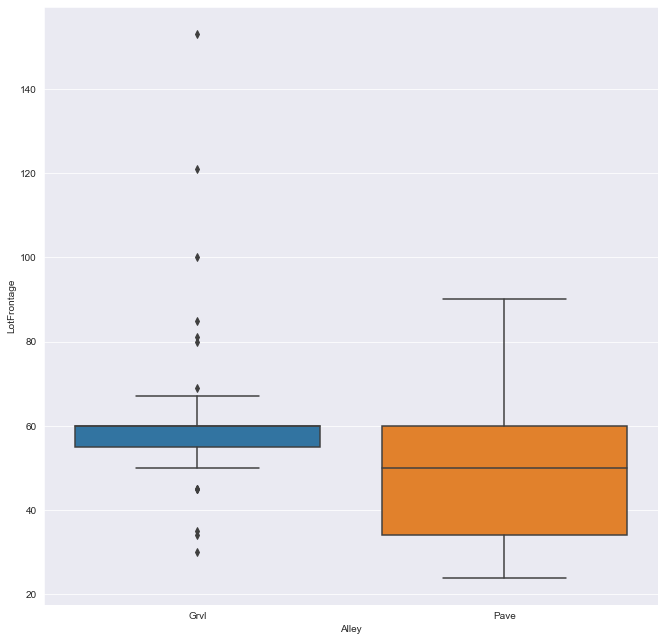

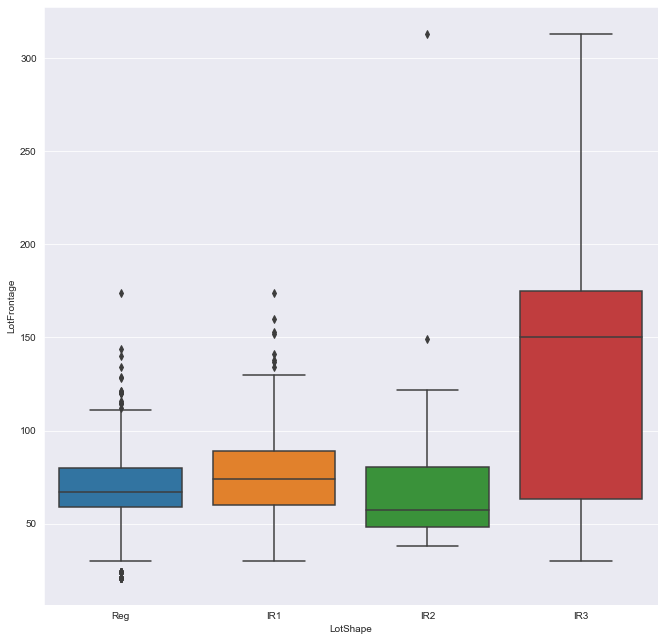

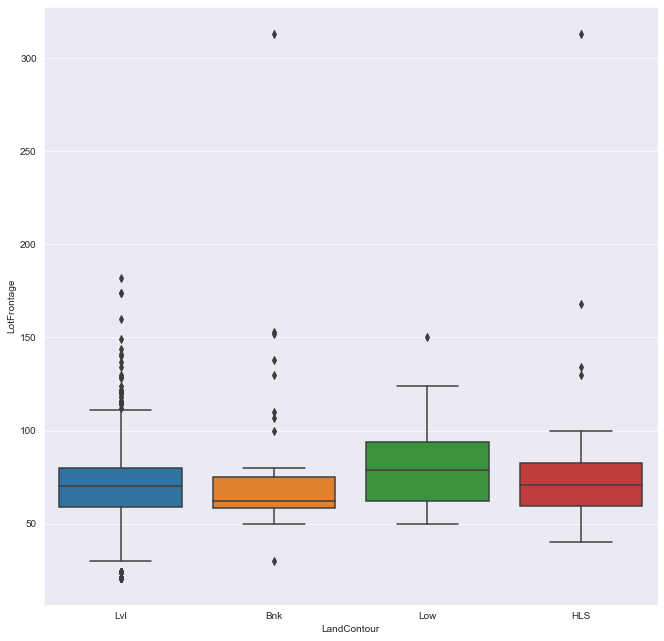

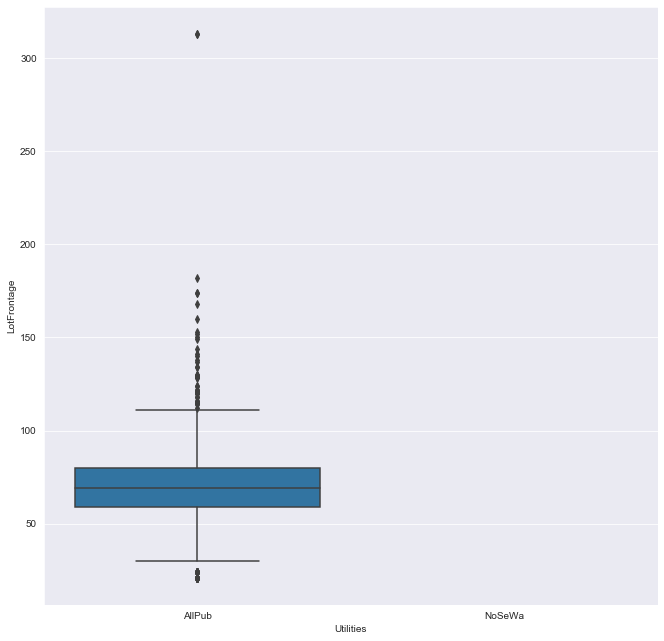

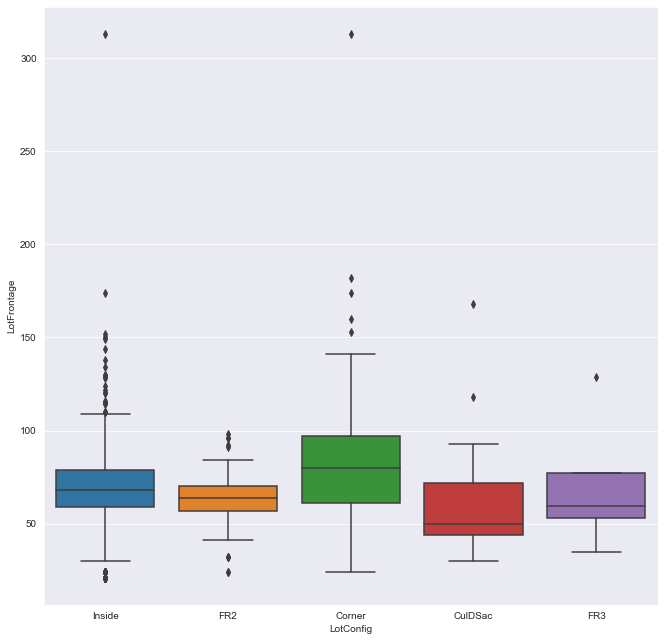

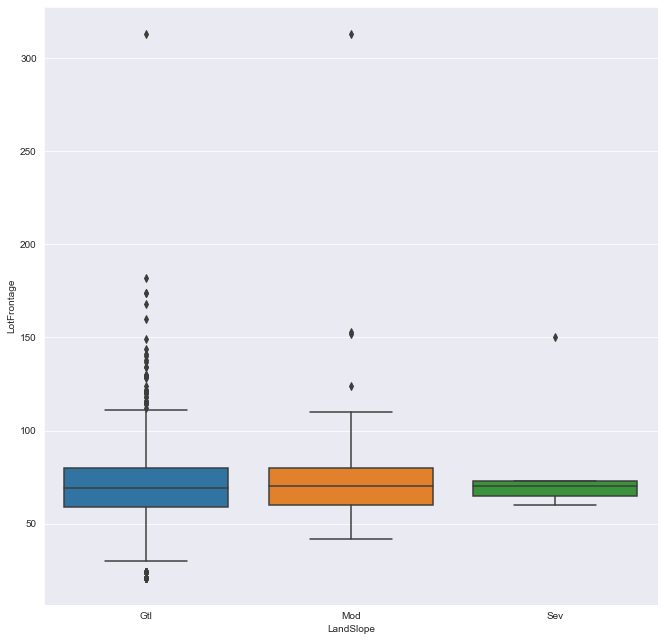

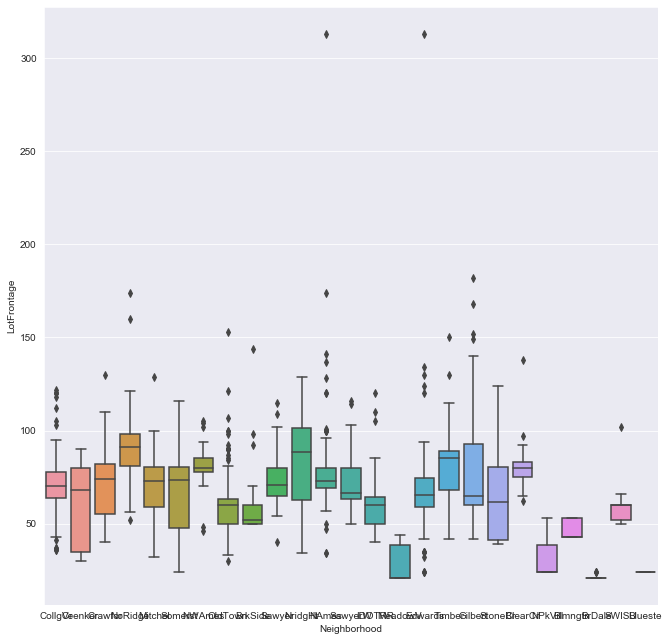

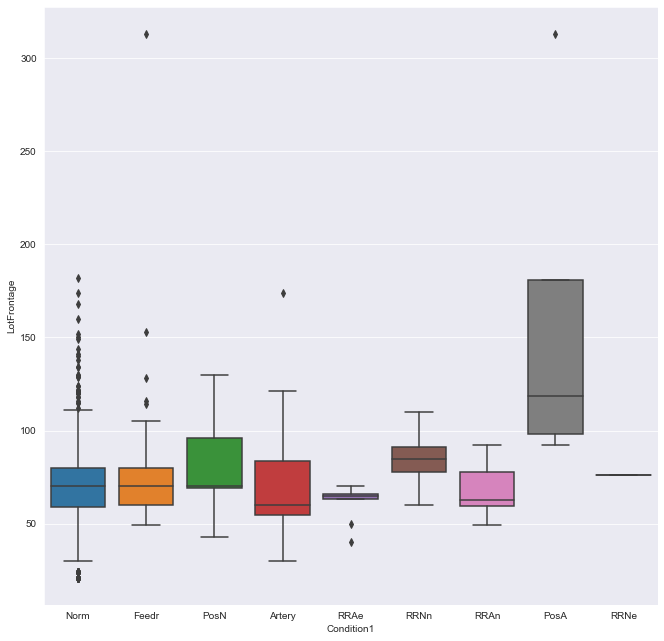

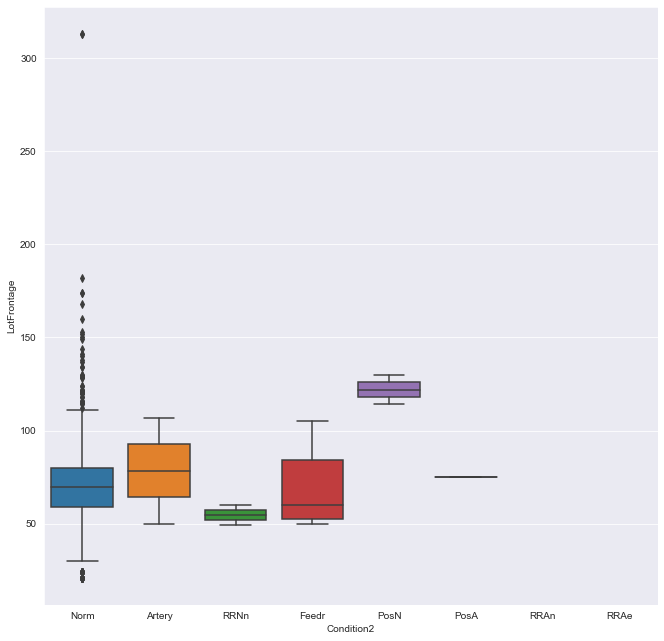

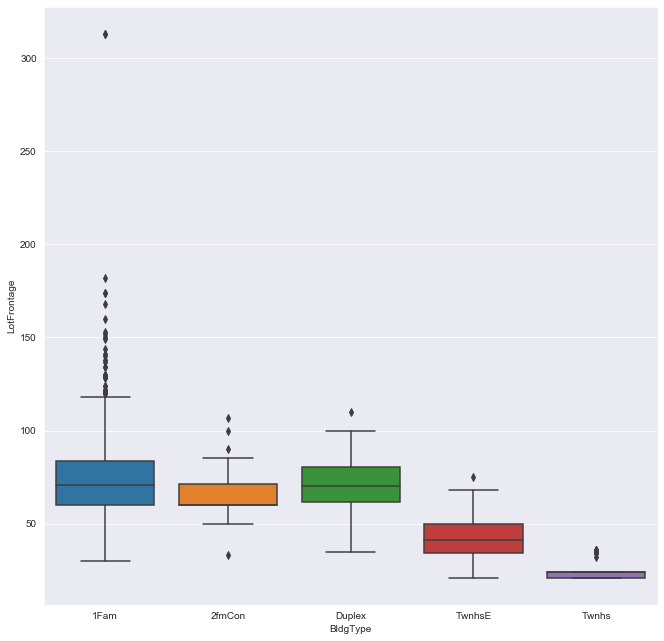

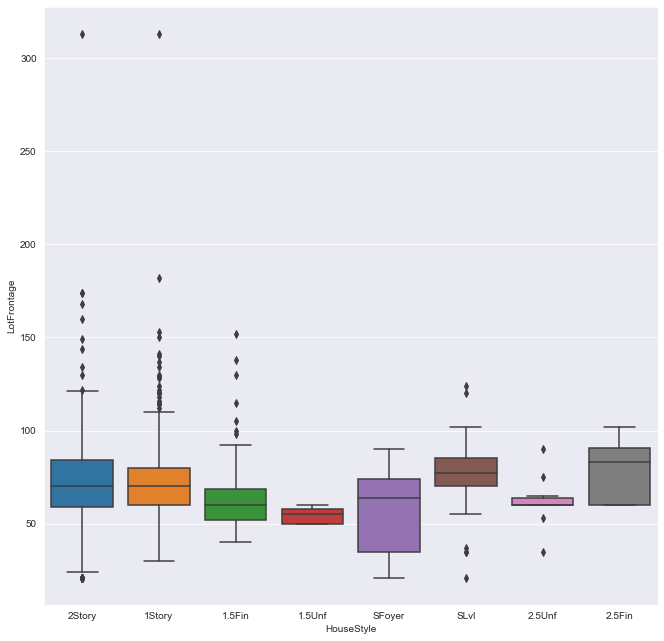

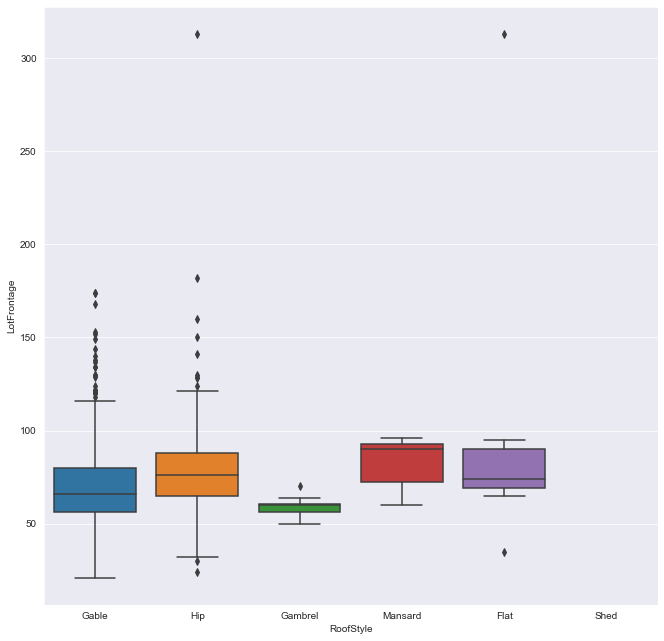

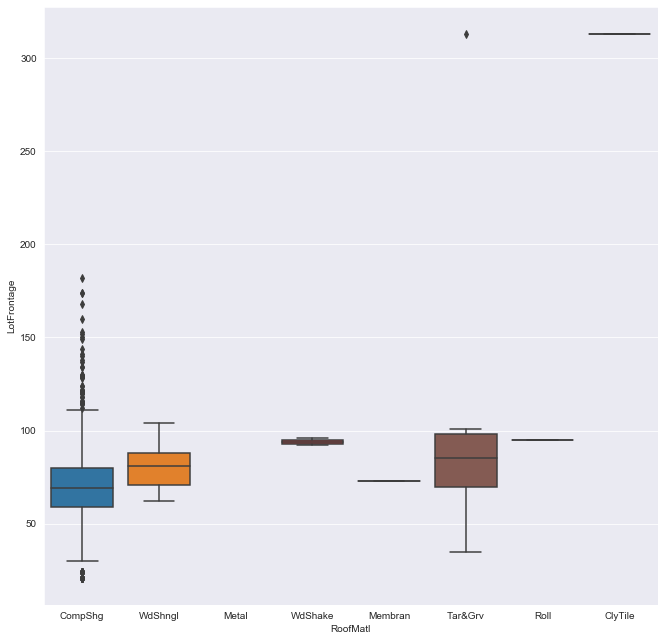

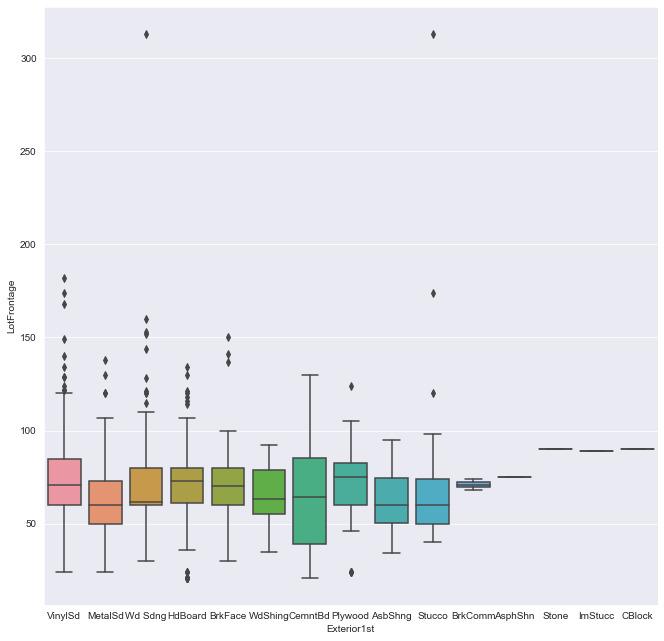

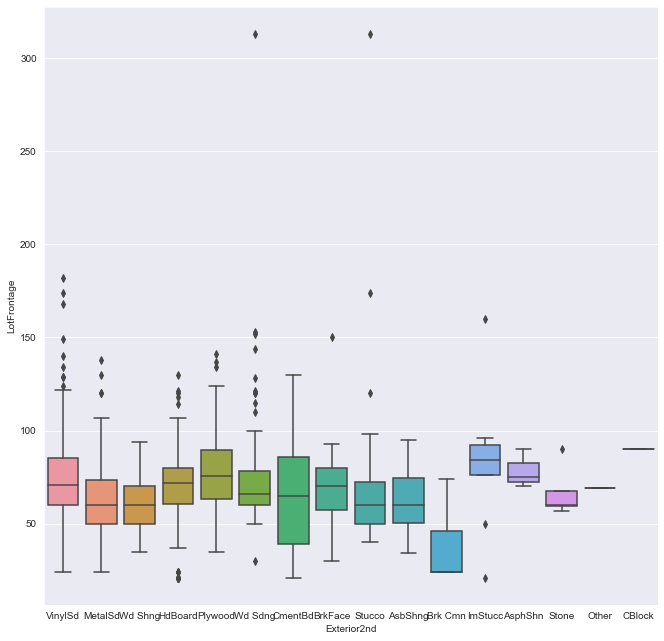

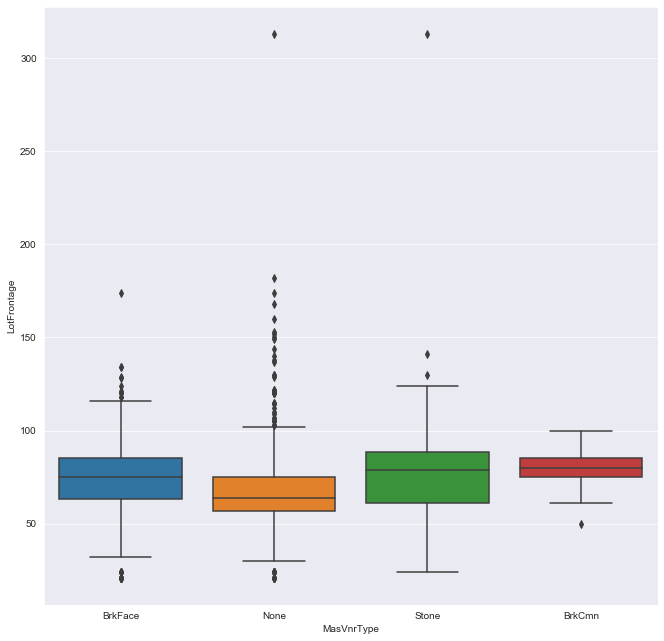

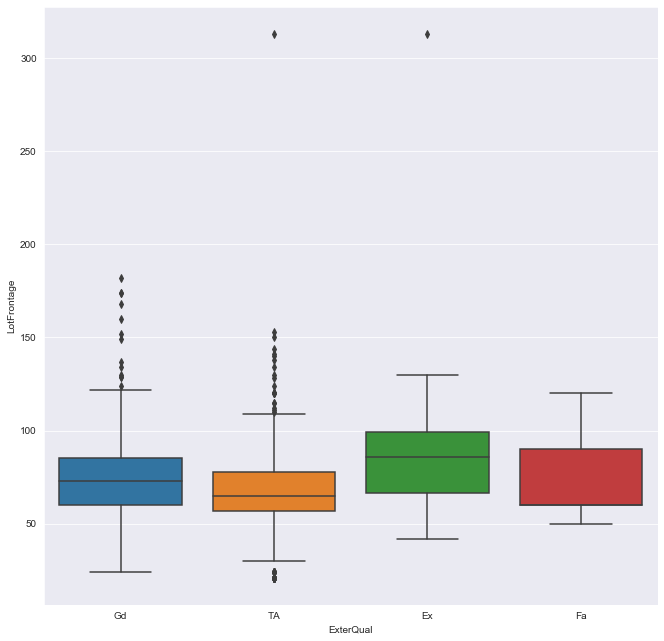

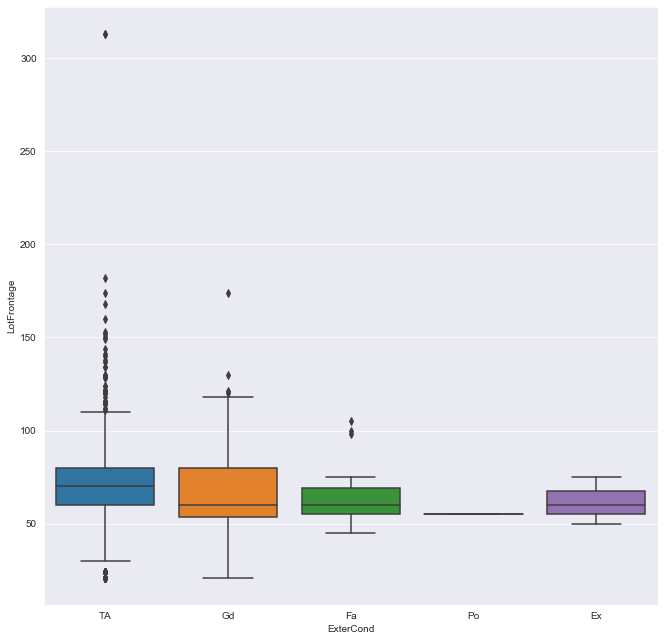

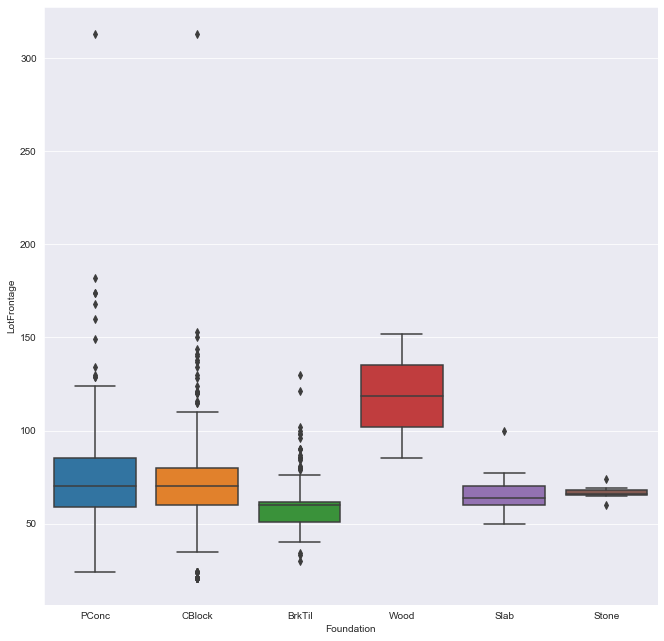

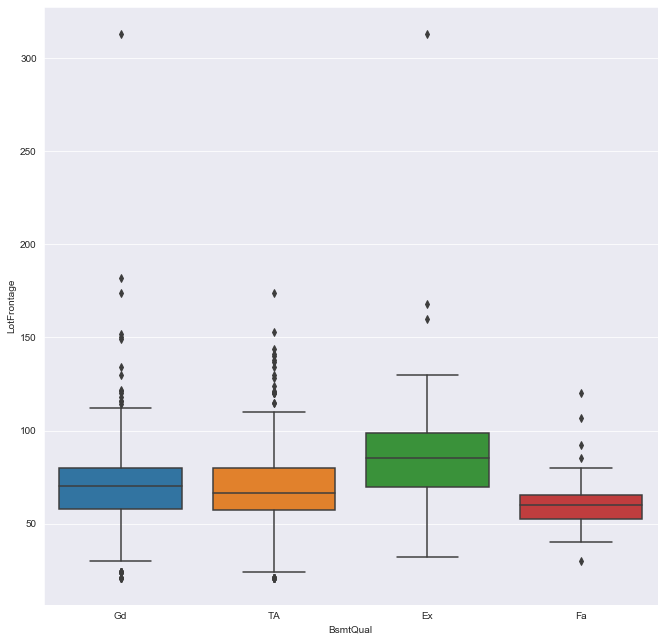

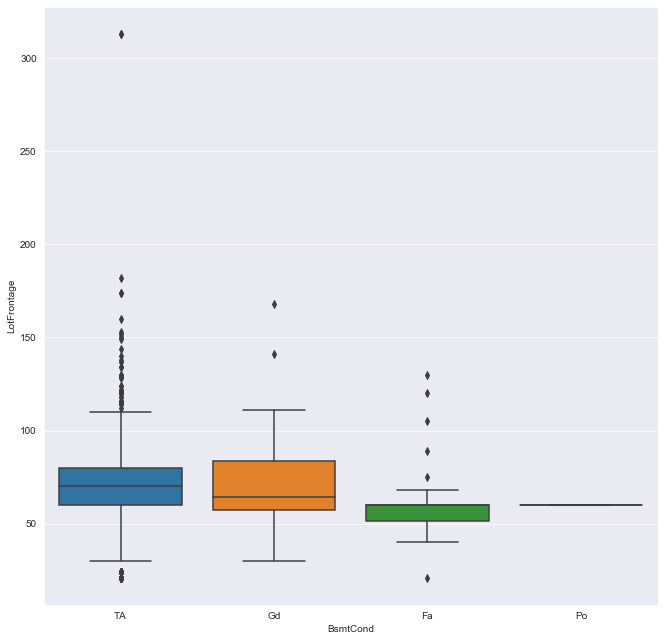

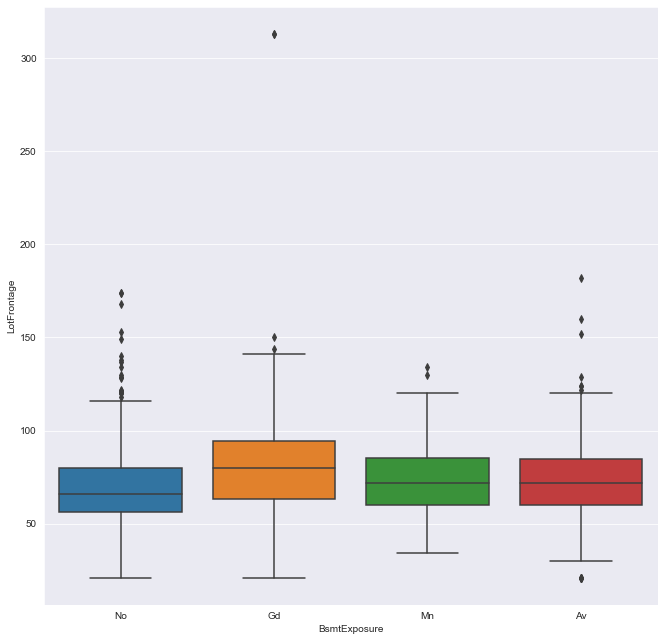

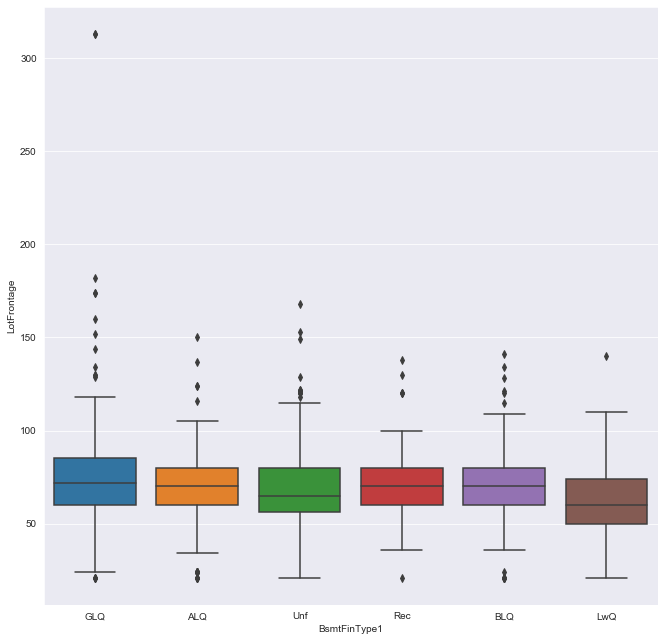

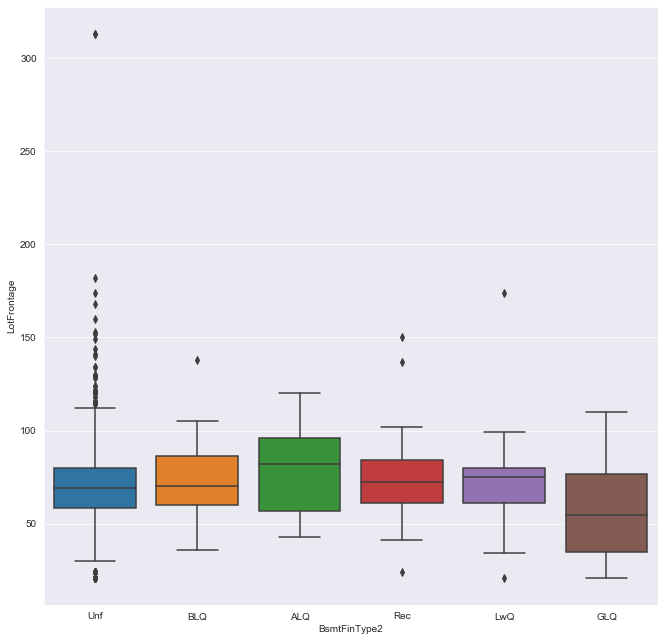

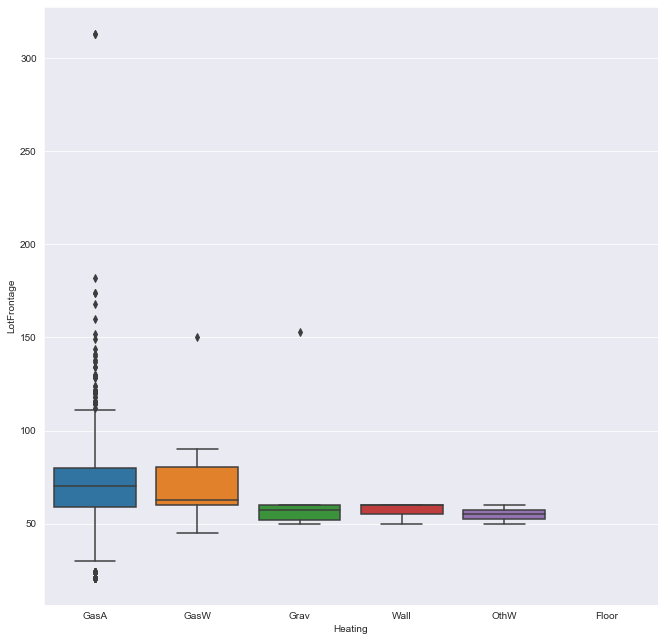

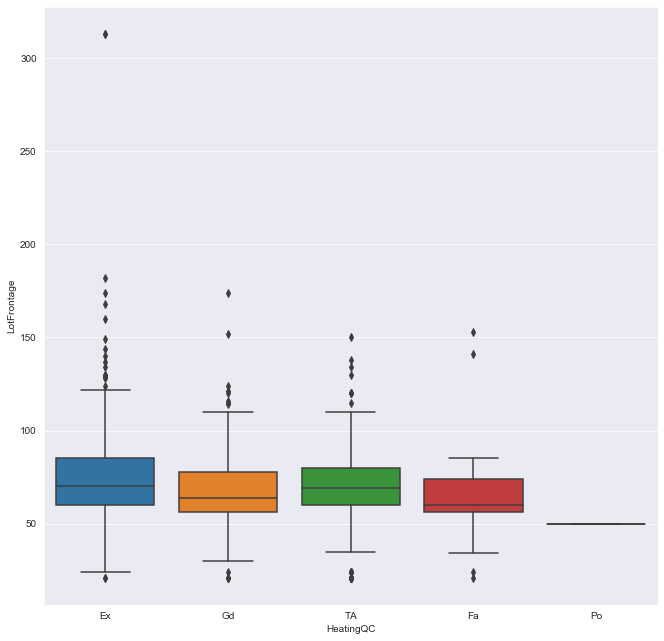

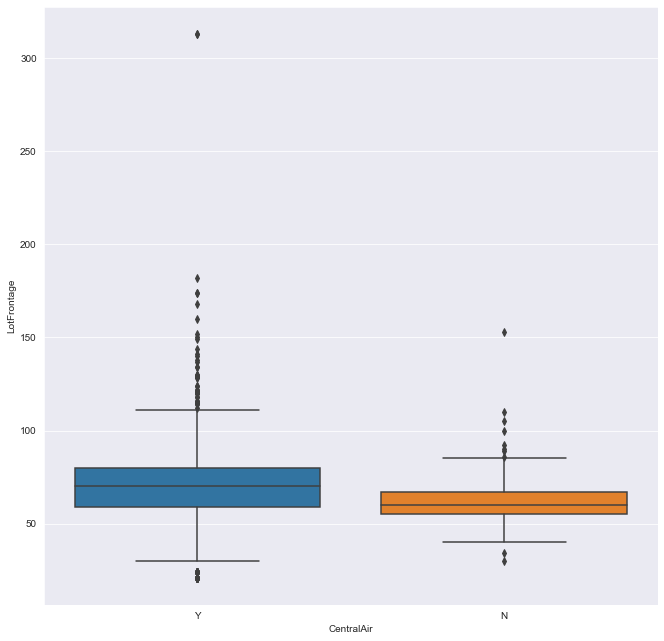

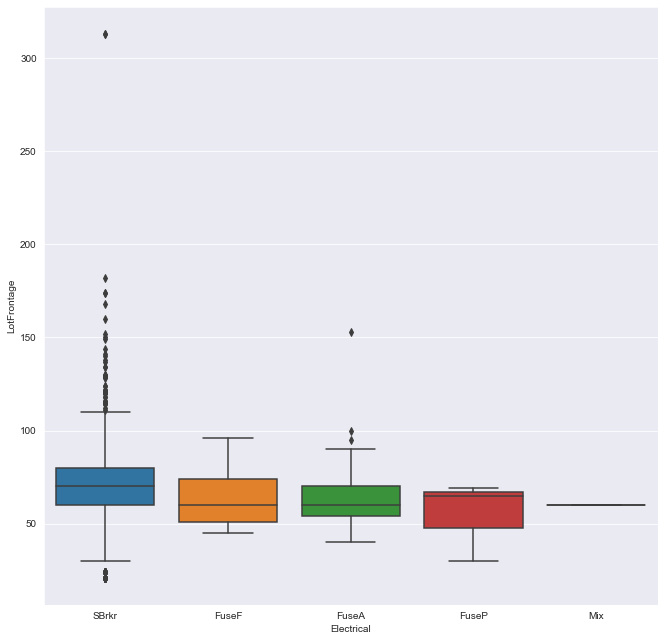

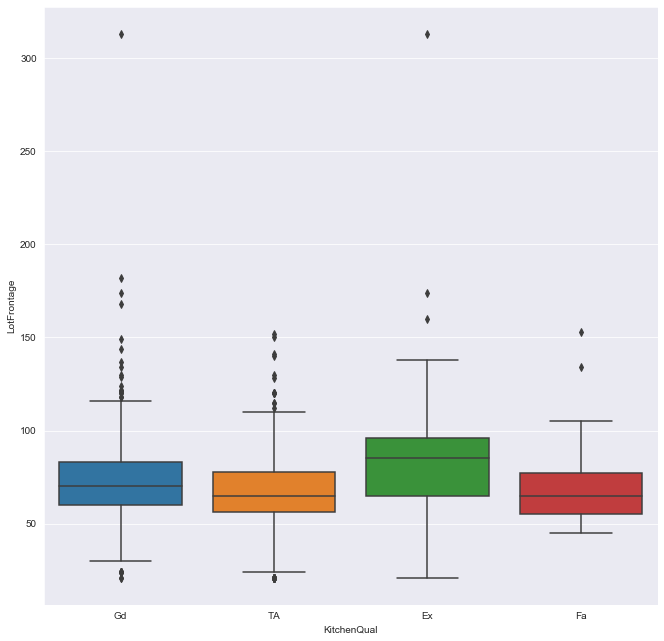

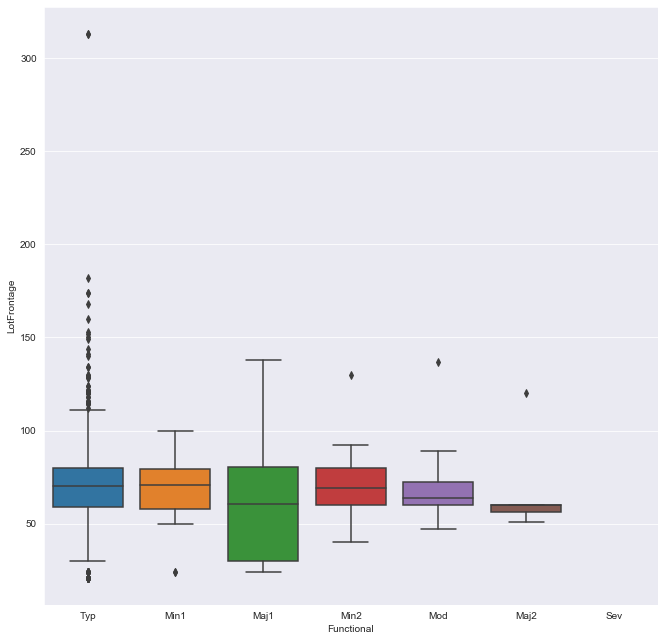

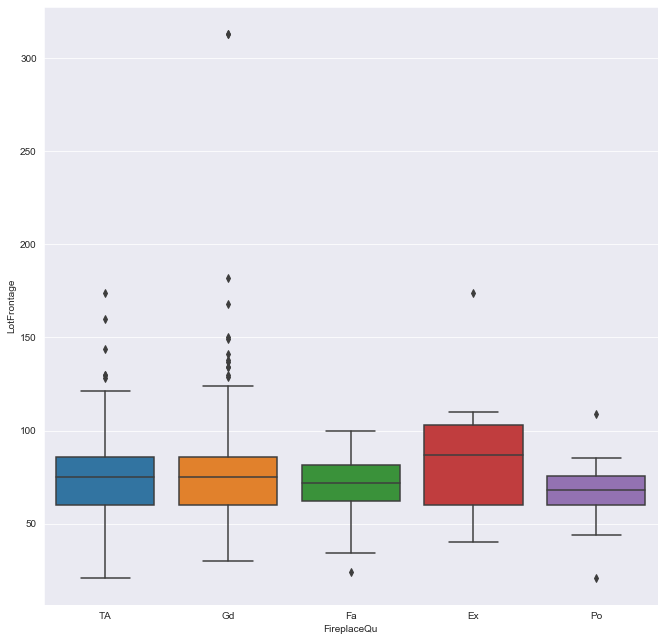

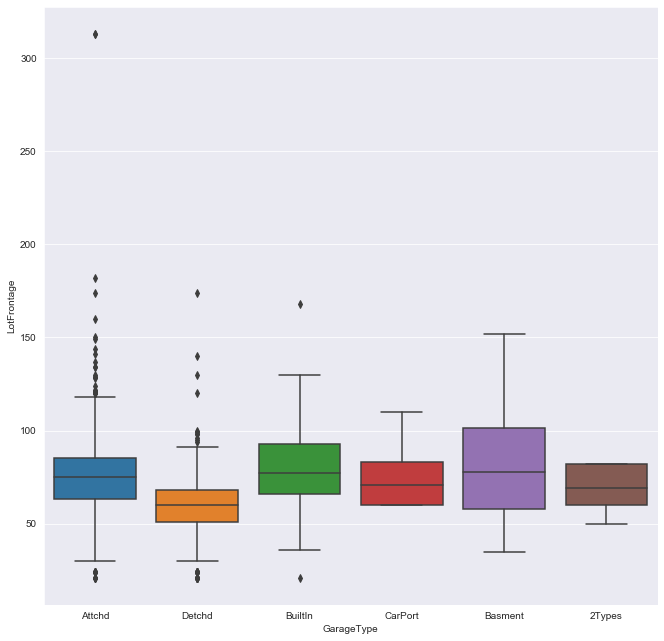

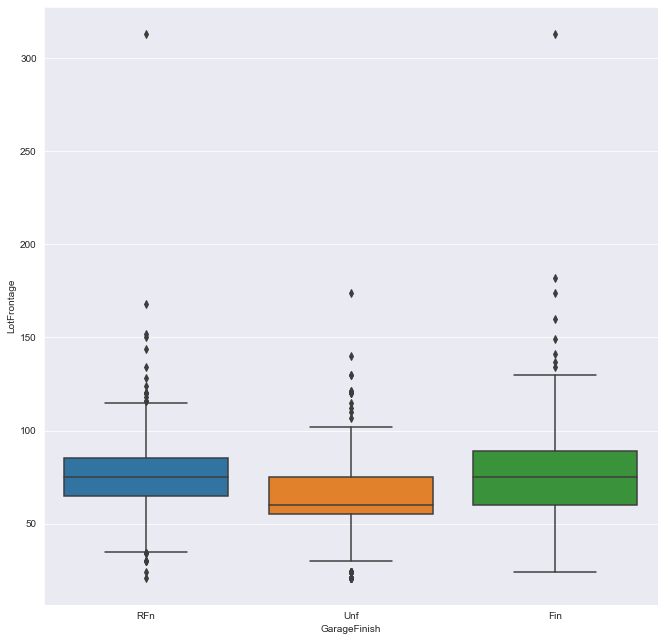

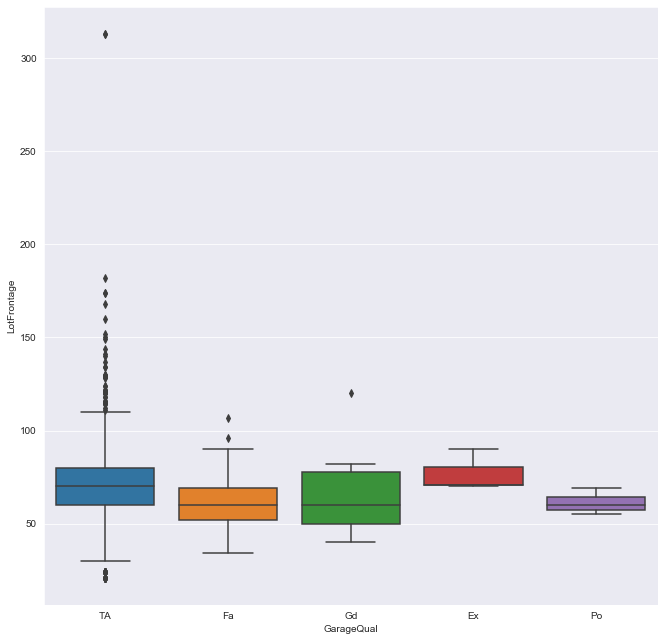

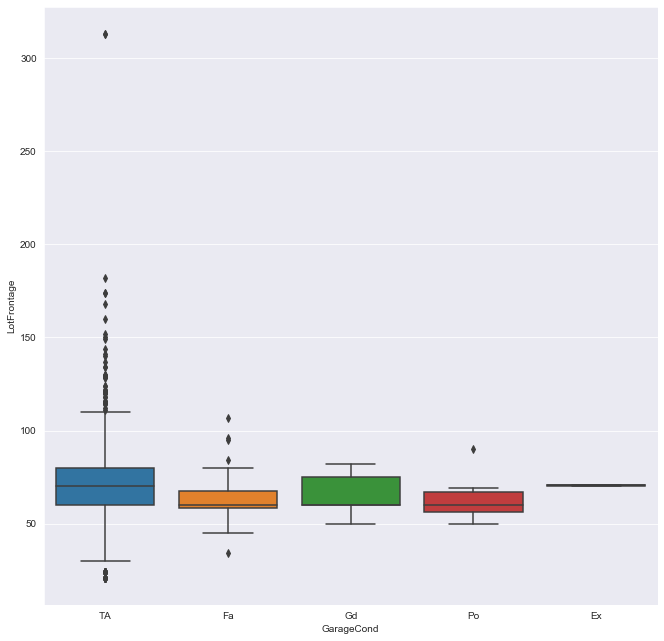

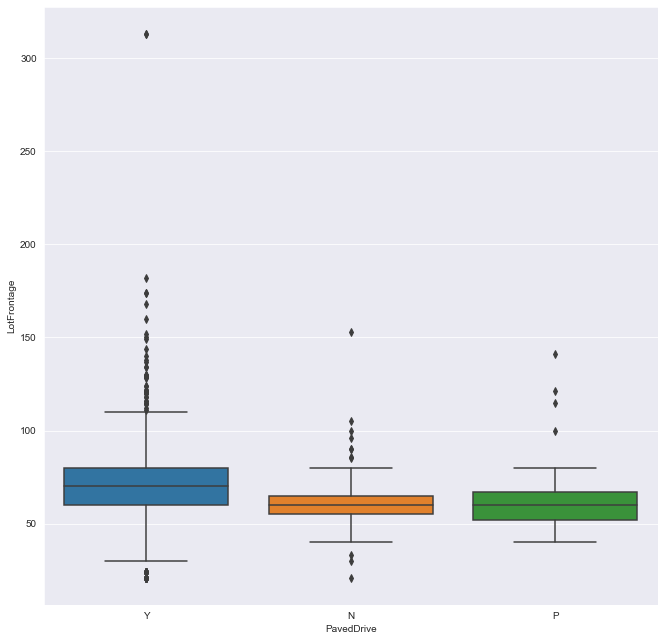

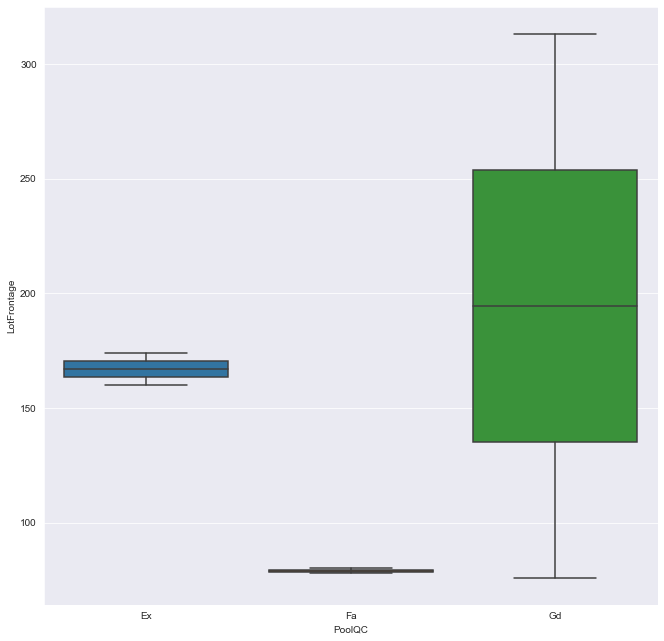

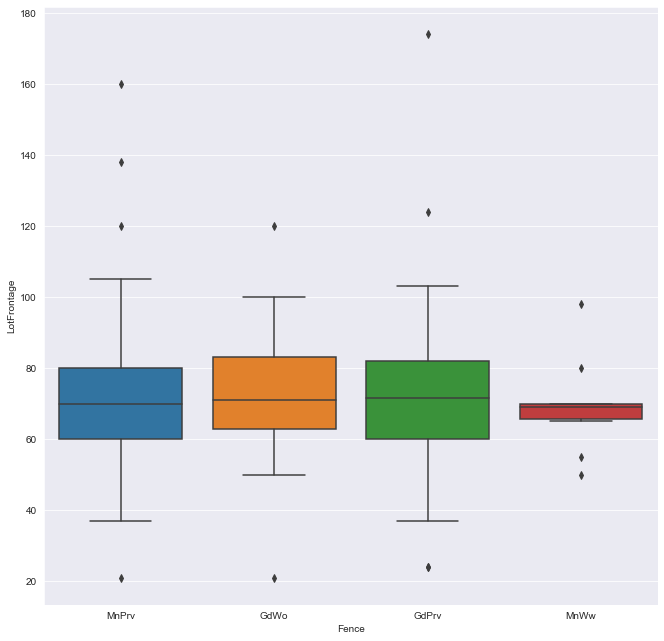

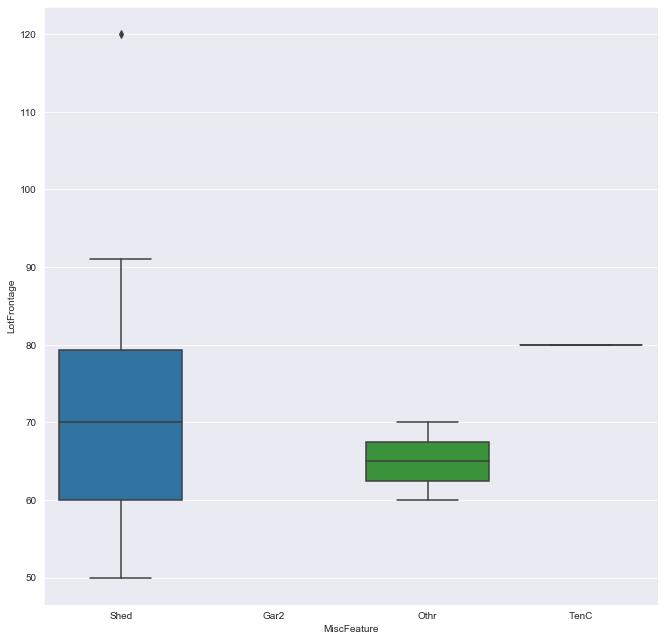

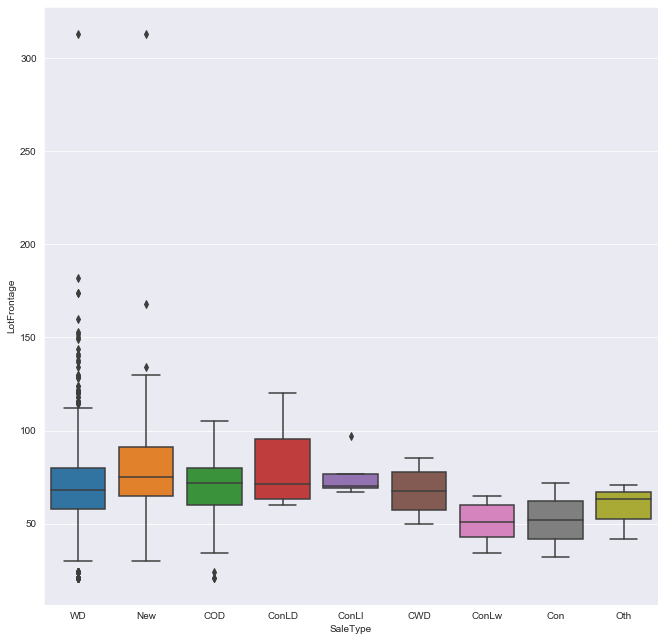

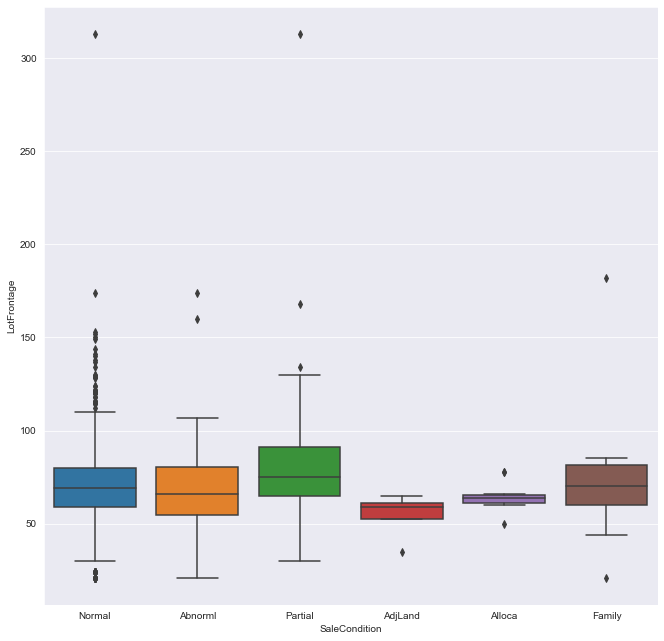

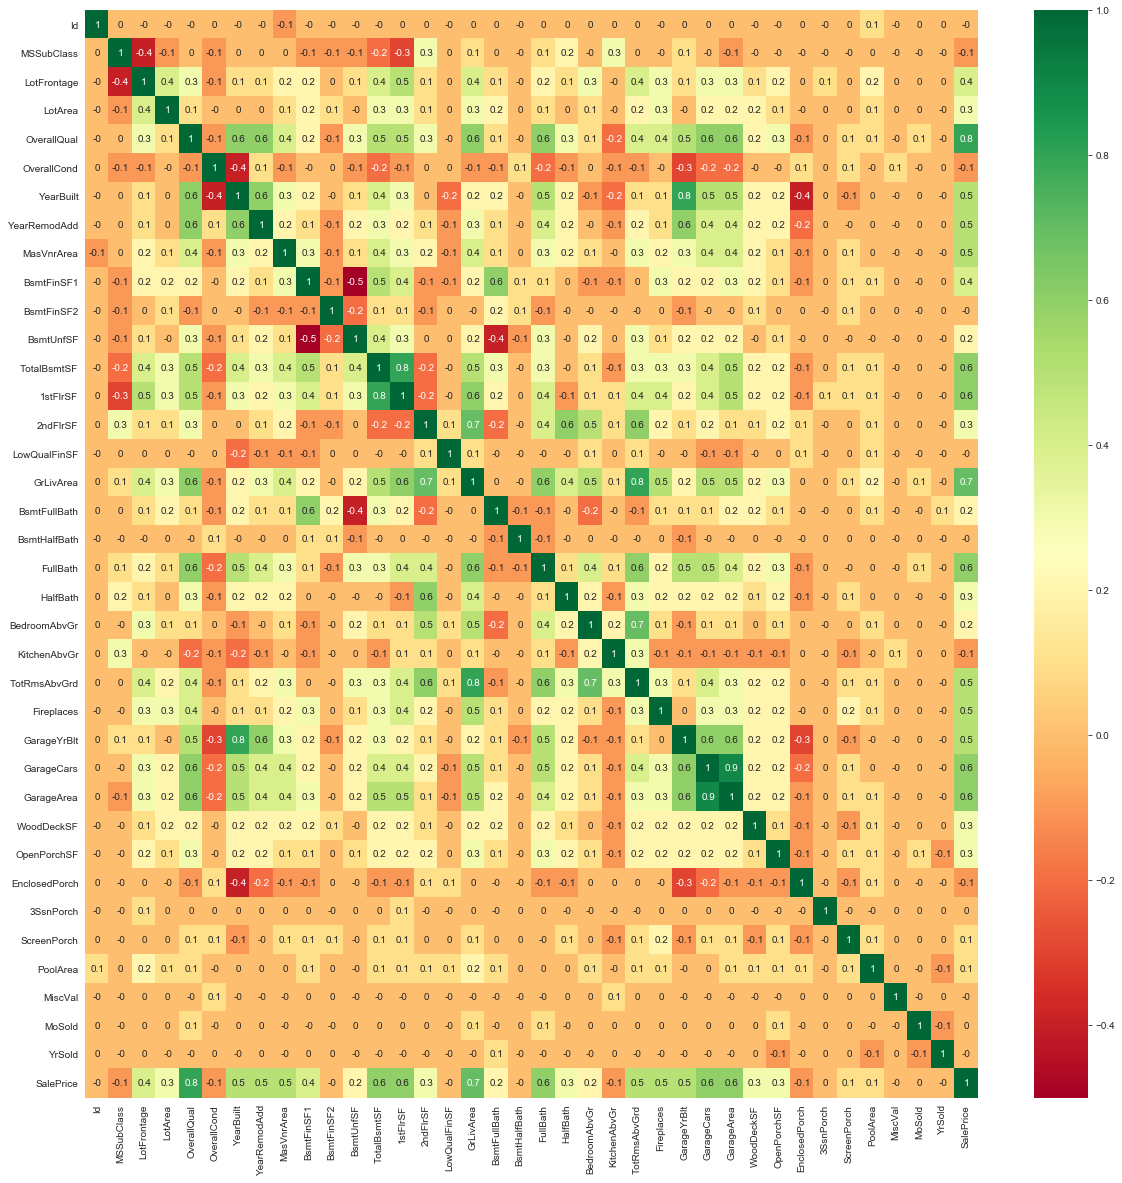

In [91]:
##missing value correction
#columns to check- PoolQC , Fence , MiscFeature, GarageCond, GarageQual, GarageFinish, GarageYrBlt , GarageType, Electrical 
#FireplaceQu , BsmtFinType2, BsmtFinType1, BsmtExposure, BsmtCond , BsmtQual, MasVnrType, MasVnrArea,  Alley, LotFrontage

train['BsmtExposure'].value_counts().index[0]
train['GarageYrBlt'].median()
#train['LotFrontage']
import seaborn as sns
from matplotlib.pyplot import yticks, xticks, subplots, set_cmap
import matplotlib.pyplot as plt
for i in categorical_vars:
    plt.figure(figsize=(11,11))
    sns.boxplot(x=train[i],y=train['LotFrontage'])
    plt.show()
    plt.close()
#train[train['LotFrontage']
corrmat = train.corr().round(1)
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")
train['Electrical'].value_counts()
train_null_counts=train.apply(lambda x: x.isnull().sum(axis=0))

In [92]:
#missing value imputation for both train & test

df['PoolQC'].fillna('NA',inplace=True)
df['Fence'].fillna('None',inplace=True)
df['MiscFeature'].fillna('NA',inplace=True)
df['GarageCond'].fillna('NA',inplace=True)
df['GarageQual'].fillna('NA',inplace=True)
df['GarageFinish'].fillna('NA',inplace=True)
df['GarageYrBlt'].fillna(df['YearBuilt'],inplace=True)
df['GarageType'].fillna('NA',inplace=True)
df['FireplaceQu'].fillna('NA',inplace=True)
df['BsmtFinType2'].fillna('NA',inplace=True)
df['Electrical'].fillna(df['Electrical'].value_counts().index[0],inplace=True)
df['BsmtFinType1'].fillna('NA',inplace=True)
df['BsmtExposure']=np.where((df['BsmtExposure'].isnull()) & (df['BsmtFinType1']=='NA'),'NA',df['BsmtExposure'])
df['BsmtExposure'].fillna(df['BsmtExposure'].value_counts().index[0],inplace=True)
df['BsmtQual'].fillna('NA',inplace=True)
df['BsmtCond'].fillna('NA',inplace=True)
df['MasVnrType'].fillna('None',inplace=True)
df['MasVnrArea'].fillna(0.0,inplace=True)
df['Alley'].fillna('NA',inplace=True) 
# df['LotFrontage']=np.where((df['LotFrontage'].isnull()) & (df['Alley']=='NA'),df[df['Alley']=='NA'].LotFrontage.mean(),df['LotFrontage'] )
# df['LotFrontage']=np.where((df['LotFrontage'].isnull()) & (df['Alley']=='Grvl'),df[df['Alley']=='Grvl'].LotFrontage.mean(),df['LotFrontage'] )
# df['LotFrontage']=np.where((df['LotFrontage'].isnull()) & (df['Alley']=='Pave'),df[df['Alley']=='Pave'].LotFrontage.mean(),df['LotFrontage'] )
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
#MSZoning , Utilities, Exterior2nd, BsmtFinSF1,BsmtFinSF2,
# BsmtHalfBath, GarageArea
df['Exterior1st'].fillna(df['Exterior1st'].value_counts().index[0],inplace=True)
df['BsmtUnfSF'].fillna(0.0,inplace=True)
df['TotalBsmtSF'].fillna(0.0,inplace=True)
df['BsmtFullBath'].fillna(0.0,inplace=True)
df['KitchenQual'].fillna('TA',inplace=True)
df['Functional'].fillna('Typ',inplace=True)
df['GarageCars'].fillna(0.0,inplace=True)
df['MSZoning'].fillna(df['MSZoning'].value_counts().index[0],inplace=True)
df['Utilities'].fillna(df['Utilities'].value_counts().index[0],inplace=True)
df['Exterior2nd'].fillna(df['Exterior2nd'].value_counts().index[0],inplace=True)
df['BsmtFinSF1'].fillna(0.0,inplace=True)
df['BsmtFinSF2'].fillna(0.0,inplace=True)
df['BsmtHalfBath'].fillna(0.0,inplace=True)
df['GarageArea'].fillna(0.0,inplace=True)

In [93]:
df['BsmtHalfBath'].value_counts(dropna=False)

0.0    2740
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [94]:

#Transforming some numerical variables that are really categorical
#MSSubClass=The building class
df['MSSubClass'] = df['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df['OverallCond'] = df['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)


In [95]:
#Label Encoding some categorical variables that may contain information in their ordering set
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

# shape        
print('Shape df: {}'.format(df.shape))


Shape df: (2915, 82)


In [96]:
# Adding total sqfootage feature 
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']


In [98]:
cat=df.select_dtypes(include=['object']).columns
#One Hot Encoding of the Categorical features 
ls=[]
list_df=[]
for i in cat:
    locals()['df_' + str(i)]=pd.get_dummies(df[i],prefix="_"+i)
    ls.append(locals()['df_' + str(i)])
df.drop(cat,axis=1,inplace=True)
list_df.append(df)
list_df.extend(ls)
df=pd.concat(list_df,axis=1)    



In [63]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
# skewness = df.apply(lambda x: skew(x))
# skewness = skewness[abs(skewness) > 0.5]
# print(str(skewness.shape[0]) + " skewed numerical features to log transform")
# skewed_features = skewness.index
# df[skewed_features] = np.log1p(df[skewed_features])

from scipy.special import boxcox1p
lam = 0.15

#log transformation of numeric features
for i in numerical_vars:
    if i!='Id' and i!='SalePrice':
        skewness=skew(df[i])
        #print('skewness of ',i,skewness)
        if abs(skewness)>0.5:
            #df[i]=np.log1p(df[i])
            df[i] = boxcox1p(df[i], lam)

In [64]:
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       '_SaleType_ConLw', '_SaleType_New', '_SaleType_Oth', '_SaleType_WD',
       '_SaleCondition_Abnorml', '_SaleCondition_AdjLand',
       '_SaleCondition_Alloca', '_SaleCondition_Family',
       '_SaleCondition_Normal', '_SaleCondition_Partial'],
      dtype='object', length=304)

In [65]:
#df.reset_index(inplace=True)
#df.drop(['level_0','index'],axis=1,inplace=True)
df.shape

(2915, 304)

In [81]:
train=df.head(1459)
test=df.tail(1459)
target=train['SalePrice']
train.drop(['type','SalePrice'],axis=1,inplace=True)
test.drop(['type','SalePrice'],axis=1,inplace=True)


 mu = 12.02 and sigma = 0.40

Skewness: 0.121580
Kurtosis: 0.804751


C:\Users\Ankita\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Ankita\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Ankita\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


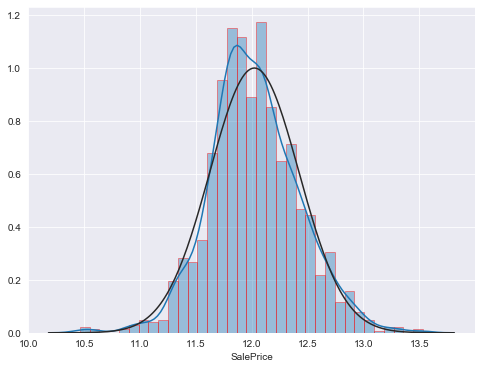

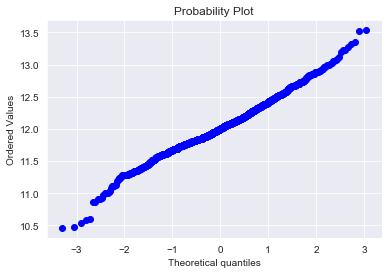

C:\Users\Ankita\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Ankita\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Ankita\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


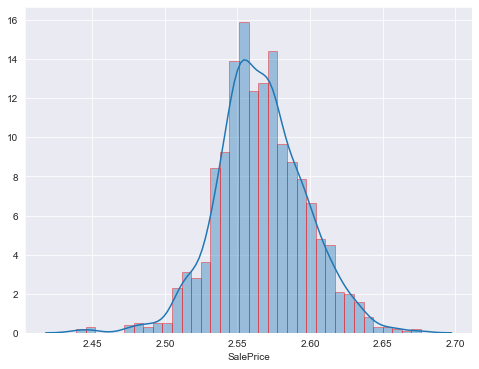

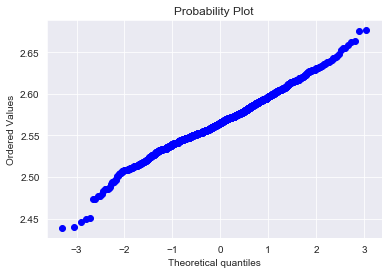

In [83]:
plt.figure(figsize=(8,6))
sns.distplot(target,hist_kws={"edgecolor": (1,0,0,1)},fit=norm)  #right skewed

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(target[target>0])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(target, plot=plt)
plt.show()

target= np.log1p(target)
plt.figure(figsize=(8,6))
sns.distplot(target,hist_kws={"edgecolor": (1,0,0,1)})  #right skewed

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(target, plot=plt)
plt.show()

In [80]:
len(target)

1459

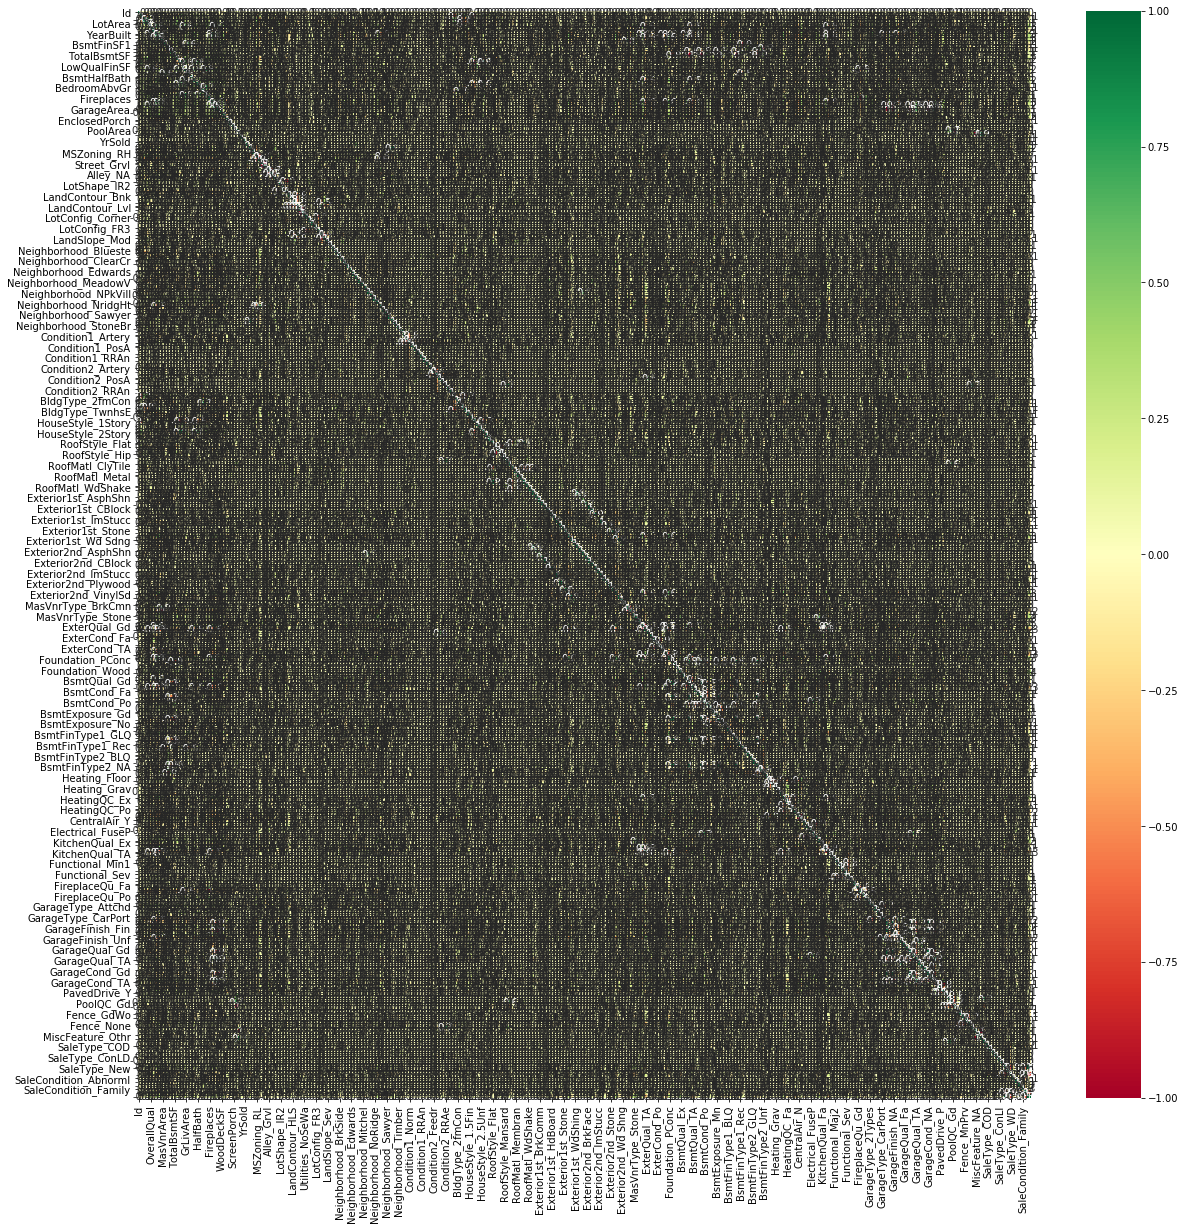

In [16]:
#check correlation
corrmat = train.corr().round(1)
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [17]:
train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=303)

In [18]:

#drop correlated columns
columns = np.full((corrmat.shape[0],), True, dtype=bool)
for i in range(corrmat.shape[0]):
    for j in range(i+1, corrmat.shape[0]):
        if corrmat.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = train.columns[columns]
train = train[selected_columns]

In [19]:
len(selected_columns)

286

In [20]:
selected_columns = train.iloc[:,1:].columns
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                try:
                    if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                        x = np.delete(x, j, 1)
                        columns = np.delete(columns, j)
                except:
                    continue
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(train.iloc[:,1:].values, target.values, SL, selected_columns)

In [22]:
len(selected_columns)
target

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1454    12.128117
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
Name: SalePrice, Length: 1459, dtype: float64

In [23]:
len(selected_columns)

data = pd.DataFrame(data = data_modeled, columns = selected_columns)


In [24]:
selected_columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'YrSold', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave',
       'LandContour_HLS', 'LandContour_Lvl', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_Inside', 'LandSlope_Gtl',
       'LandSlope_Mod', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Sawyer', 'Neighborhood_StoneBr', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAn',
       'Condition1_RRNn', 'Condition2_PosA', 'Condition2_PosN',
       'HouseStyle_1.5Unf', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'Roo

In [25]:
#split_data
x_train, x_test, y_train, y_test = train_test_split(data.values,target.values, test_size = 0.2)

In [26]:
target

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1454    12.128117
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
Name: SalePrice, Length: 1459, dtype: float64

In [27]:
scaler = StandardScaler()   
scaler=scaler.fit(x_train)
pickle.dump(scaler,open('scaler.pkl','wb'))

scaler=pickle.load(open('scaler.pkl','rb'))
x_train = scaler.transform(x_train)
x_test= scaler.transform(x_test)

In [28]:
names = ["GBM","XGB","LGBM"]
#XGBRegressor(max_delta_step=2,scale_pos_weight=100)   -  "XGB"
regressors = [GradientBoostingRegressor(n_estimators=100,random_state=0,verbose=1),
    XGBRegressor(max_delta_step=2,scale_pos_weight=20,random_state=0) ,
    LGBMRegressor(n_estimators=100,random_state=0,num_leaves=40,learning_rate=0.5)]

In [29]:
rmse=[]
#num_leaves=150, objective='regression',max_depth=7,learning_rate=.05,max_bin=200
for name,model in zip(names,regressors):
    print(name, model)
    model.fit(x_train, y_train)
    score = model.score(np.array(x_test), y_test)
    y_pred=model.predict(x_test)
    score=cross_val_score(model, x_test, y_test, cv=5, scoring='neg_mean_squared_log_error')
    print('Rmse',score.mean())
    rmse.append(score.mean())

GBM GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=False)
      Iter       Train Loss   Remaining Time 
         1           0.1334            0.79s
         2           0.1162            0.78s
         3           0.1017            0.52s
         4           0.0896            0.58s
         5           0.0795            0.61s
         6           0.0708            0.50s
         7       

In [34]:
rmse

[-0.00021880609688638636, -0.00020093498646298085, -0.00028059800359426016]

In [30]:

from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[3,5,7],'min_samples_split':[2,5], 'max_features':[3,4],'n_estimators':[100,500,1000],
              'scale_pos_weight':[10,20,50],'max_delta_step':[1,2,3]}

model=XGBRegressor()
model = GridSearchCV(model, param_grid=parameters,cv=5,verbose=10,scoring='neg_mean_squared_log_error')
model3=GradientBoostingRegressor()
model3 = GridSearchCV(model3, param_grid=parameters,cv=5,verbose=10,scoring='neg_mean_squared_log_error')

model2=LGBMRegressor(max_delta_step=2,scale_pos_weight=100)
model2 = GridSearchCV(model2, param_grid=parameters,cv=5,verbose=10,scoring='neg_mean_squared_log_error')

print(model)
model.fit(x_train, y_train)

#score = model.score(np.array(x_test), y_test)
#y_pred=model.predict(x_test)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_delta_step': [1, 2, 3], 'max_depth': [3, 5, 7],
                         'max_features': [3, 4],
           

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=20, score=-0.017, total=   0.2s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=20 
[10:39:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=20, score=-0.017, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=20 
[10:39:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=20, score=-0.016, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=20 
[10:39:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=20, score=-0.016, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=20 
[10:39:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s


[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=20, score=-0.015, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[10:39:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.017, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[10:39:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.8s remaining:    0.0s


[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.017, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[10:39:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.016, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[10:39:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.0s remaining:    0.0s


[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.016, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[10:39:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.015, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[10:39:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.017, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[10:39

[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.0s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[10:39:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.0s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[10:39:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.0s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[10

[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   2.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500 
[10:40:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500 
[10:40:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=50

[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.3s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500 
[10:41:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.3s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500 
[10:41:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.3s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=20 

[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.0s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20 
[10:42:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.0s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20 
[10:42:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.0s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20 
[10:42:06

[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.2s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20 
[10:42:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[10:42:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   2.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[10

[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.3s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[10:43:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.3s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[10:43:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.5s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[10

[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50, score=-0.015, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100 
[10:44:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.017, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100 
[10:44:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.017, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100

[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.0s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100 
[10:44:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.0s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100 
[10:44:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.0s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50

[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   2.2s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500 
[10:45:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500 
[10:45:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_wei

[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.3s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500 
[10:46:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.4s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500 
[10:46:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.6s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_wei

[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500, score=-0.015, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20 
[10:47:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.0s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20 
[10:47:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.0s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20 
[10:47:1

[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.1s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20 
[10:47:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.1s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20 
[10:47:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.1s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50 
[10

[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.3s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[10:48:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.3s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[10:48:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.7s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[10

[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50 
[10:49:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.016, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50 
[10:49:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.015, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100 
[10:49:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth

[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.0s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[10:50:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.0s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[10:50:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.0s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[10

[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   2.1s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100 
[10:50:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   2.1s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500 
[10:50:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.1s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50

[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.3s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500 
[10:52:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.4s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500 
[10:52:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.5s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=50

[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=500, score=-0.015, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20 
[10:52:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.0s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20 
[10:52:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.0s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20 
[1

[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.1s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20 
[10:52:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.1s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20 
[10:52:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.3s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=5

[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=20, score=-0.000, total=   4.4s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50 
[10:53:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.5s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50 
[10:53:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.6s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=5

[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.016, total=   0.1s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[10:54:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.016, total=   0.1s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[10:54:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.015, total=   0.1s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[10:54:5

[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.6s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[10:55:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.6s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[10:55:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.6s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[10

[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   3.4s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100 
[10:56:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   3.4s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500 
[10:56:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   3.3s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=50

[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.2s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500 
[10:57:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.1s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500 
[10:57:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.3s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=50

[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500, score=-0.015, total=   0.1s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20 
[10:58:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.6s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20 
[10:58:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.6s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20 
[10:58:0

[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   3.1s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20 
[10:58:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   3.5s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20 
[10:58:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   3.4s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[10

[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.3s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[11:00:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.2s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[11:00:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.1s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[11

[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50 
[11:01:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50, score=-0.016, total=   0.1s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50 
[11:01:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50, score=-0.015, total=   0.1s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100 
[11:01:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_

[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.6s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100 
[11:01:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.6s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100 
[11:01:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.6s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=10

[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   3.1s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100 
[11:02:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   3.4s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100 
[11:02:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   3.5s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_wei

[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   4.3s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500 
[11:03:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.3s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500 
[11:03:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.2s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_wei

[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500 
[11:04:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500, score=-0.016, total=   0.1s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500 
[11:04:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500, score=-0.015, total=   0.1s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20 
[11:04:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_de

[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   3.3s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20 
[11:04:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   3.3s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20 
[11:04:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   3.1s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20 
[11

[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=20, score=-0.000, total=   4.3s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=20 
[11:06:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=20, score=-0.000, total=   4.4s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[11:06:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.2s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[11

[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.016, total=   0.1s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50 
[11:07:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.016, total=   0.1s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50 
[11:07:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.015, total=   0.1s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100 
[11:07:2

[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.6s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[11:07:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.6s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[11:07:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.6s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[11

[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   3.4s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100 
[11:08:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   3.5s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500 
[11:08:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   3.4s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50

[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.2s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500 
[11:10:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.0s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500 
[11:10:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.4s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=50

[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=500, score=-0.015, total=   0.1s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20 
[11:10:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.6s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20 
[11:10:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.6s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20 
[1

[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   3.2s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20 
[11:11:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   3.6s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20 
[11:11:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   3.4s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=5

[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=20, score=-0.000, total=   4.4s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50 
[11:12:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.2s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50 
[11:12:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.3s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=5

[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[11:13:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.016, total=   0.1s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[11:13:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.015, total=   0.1s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[11:13:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth

[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   2.2s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[11:14:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   2.2s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[11:14:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   2.2s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[11

[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   2.8s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100 
[11:15:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   3.0s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500 
[11:15:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   3.0s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=50

[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   3.6s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500 
[11:16:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   3.5s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500 
[11:16:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   3.6s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=50

[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500, score=-0.015, total=   0.1s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20 
[11:16:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   2.2s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20 
[11:16:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   2.2s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20 
[11:16:5

[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.7s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20 
[11:17:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   3.0s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20 
[11:17:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.9s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[11

[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   3.6s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[11:19:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   3.6s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[11:19:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   3.5s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[11

[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50, score=-0.015, total=   0.1s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100 
[11:19:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.017, total=   0.1s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100 
[11:19:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.017, total=   0.1s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100

[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   2.1s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100 
[11:20:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   2.2s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100 
[11:20:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   2.2s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50

[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   2.8s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500 
[11:21:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.7s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500 
[11:21:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.7s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_wei

[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   3.6s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500 
[11:22:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   3.5s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500 
[11:22:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   3.6s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_wei

[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500, score=-0.015, total=   0.1s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20 
[11:22:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   2.2s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20 
[11:22:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   2.2s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20 
[11:22:5

[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.6s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20 
[11:23:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.7s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20 
[11:23:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.8s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50 
[11

[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   3.6s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[11:24:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   3.6s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[11:24:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   3.5s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[11

[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50 
[11:25:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.016, total=   0.1s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50 
[11:25:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.015, total=   0.1s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100 
[11:25:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth

[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   2.2s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[11:26:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   2.2s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[11:26:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   2.1s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[11

[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   2.7s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100 
[11:27:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   2.8s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500 
[11:27:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.7s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50

[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   3.7s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500 
[11:28:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   3.6s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500 
[11:28:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   3.6s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=50

[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20 
[11:28:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   2.2s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20 
[11:28:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   2.2s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20 
[11:28:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_d

[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.6s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20 
[11:29:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   3.1s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20 
[11:29:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.9s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=5

[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=20, score=-0.000, total=   3.8s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50 
[11:30:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   3.6s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50 
[11:30:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   3.5s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=5

[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.2s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[11:31:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.2s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[11:31:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.2s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[11:31:25

[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   1.0s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[11:31:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.1s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[11:31:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.1s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[11:

[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   2.2s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100 
[11:32:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   2.2s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100 
[11:32:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   2.2s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=50

[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.5s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500 
[11:33:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.4s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500 
[11:33:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.4s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=50

[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.2s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20 
[11:34:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.1s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20 
[11:34:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.1s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20 
[11:34:0

[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.2s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20 
[11:34:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.5s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20 
[11:34:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.2s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[11

[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.4s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[11:35:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.4s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[11:35:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.4s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[11

[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.2s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100 
[11:36:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.2s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100 
[11:36:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.2s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100

[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.1s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100 
[11:36:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.1s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100 
[11:36:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.1s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50

[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   2.2s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500 
[11:37:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.2s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500 
[11:37:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.2s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_wei

[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.4s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500 
[11:39:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.4s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500 
[11:39:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.4s
[CV] max_delta_step=2, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_wei

[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.1s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20 
[11:39:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.0s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20 
[11:39:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.1s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20 
[11:39:22

[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.2s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20 
[11:39:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.2s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50 
[11:39:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   2.2s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50 
[11

[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.4s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[11:40:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.4s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[11:41:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.5s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[11

[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.2s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100 
[11:41:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.2s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100 
[11:41:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.2s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100 
[11

[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.1s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[11:42:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.1s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=500 
[11:42:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   1.1s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=500 
[11

[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.2s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500 
[11:42:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.2s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500 
[11:42:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.2s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50

[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.4s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=20 
[11:44:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=20, score=-0.000, total=   0.2s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=20 
[11:44:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=20, score=-0.000, total=   0.2s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=20 
[1

[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.1s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20 
[11:44:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.1s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20 
[11:44:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.1s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=50 
[11

[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   2.2s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50 
[11:45:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   2.2s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50 
[11:45:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   2.2s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=5

[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.7s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50 
[11:46:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.6s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50 
[11:46:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.4s
[CV] max_delta_step=2, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=1

[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.3s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[11:47:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.2s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[11:47:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.2s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[11

[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.7s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[11:47:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.7s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=500 
[11:47:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   1.7s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=500 
[11

[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   3.3s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500 
[11:48:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   3.2s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500 
[11:48:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   3.4s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=50

[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.2s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=20 
[11:50:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=20, score=-0.000, total=   0.3s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=20 
[11:50:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=20, score=-0.000, total=   0.2s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=20 
[11:50:

[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.8s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20 
[11:50:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.7s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20 
[11:50:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.7s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=50 
[11:50:37

[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   3.4s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[11:51:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   3.6s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[11:51:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   3.2s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[11

[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.3s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[11:52:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.2s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=100 
[11:52:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   4.3s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=100 


[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.3s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100 
[11:53:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.2s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100 
[11:53:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.3s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=10

[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.7s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=500 
[11:54:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   1.7s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=500 
[11:54:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   1.7s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50

[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   3.3s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500 
[11:55:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   3.1s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500 
[11:55:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   3.4s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_wei

[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.3s
[CV] max_delta_step=2, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500 
[11:56:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.2s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=20 
[11:56:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=20, score=-0.000, total=   0.3s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=20 


[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.8s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20 
[11:56:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.7s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20 
[11:56:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.7s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20 
[11:56:59

[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   3.3s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50 
[11:57:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   3.4s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50 
[11:57:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   3.3s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50 
[11

[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.1s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[11:59:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.4s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[11:59:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.2s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=100 
[1

[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.2s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100 
[12:00:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.2s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100 
[12:00:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.2s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100 
[12

[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.7s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[12:00:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.7s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=500 
[12:00:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   1.7s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=500 
[12

[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   3.3s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500 
[12:01:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   3.4s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500 
[12:01:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   3.5s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50

[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.2s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=20 
[12:03:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=20, score=-0.000, total=   0.3s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=20 
[12:03:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=20, score=-0.000, total=   0.3s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=20 
[1

[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.9s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20 
[12:03:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.8s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20 
[12:03:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.7s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=50 
[12

[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   3.4s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50 
[12:04:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   3.3s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50 
[12:04:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   3.2s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=5

[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.1s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50 
[12:05:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.4s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50 
[12:05:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.2s
[CV] max_delta_step=2, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=1

[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.3s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[12:06:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.3s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[12:06:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.3s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[12

[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   2.3s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[12:07:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   2.3s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=500 
[12:07:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   2.3s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=500 
[12

[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.6s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500 
[12:08:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.6s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500 
[12:08:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.8s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=50

[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   3.8s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=20 
[12:09:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=20, score=-0.000, total=   0.3s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=20 
[12:09:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=20, score=-0.000, total=   0.3s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=20 
[12:09:

[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   2.2s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20 
[12:09:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   2.3s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20 
[12:09:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   2.4s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=50 
[12:09:47

[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   2.7s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[12:10:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   2.6s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[12:10:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   2.6s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[12

[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   3.6s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[12:11:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   3.7s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=100 
[12:11:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   3.6s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=100 


[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.3s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100 
[12:12:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.3s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100 
[12:12:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.3s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=10

[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   2.3s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=500 
[12:13:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   2.3s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=500 
[12:13:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   2.1s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50

[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.6s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500 
[12:14:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.6s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500 
[12:14:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.7s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_wei

[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   3.6s
[CV] max_delta_step=2, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500 
[12:15:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   3.8s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=20 
[12:15:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=20, score=-0.000, total=   0.4s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=20 


[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   2.2s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20 
[12:15:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   2.2s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20 
[12:15:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   2.3s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20 
[12:15:41

[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.8s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50 
[12:16:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   2.8s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50 
[12:16:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   2.6s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50 
[12

[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   3.5s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[12:17:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   3.7s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[12:17:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   3.8s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=100 
[1

[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.3s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100 
[12:18:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.3s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100 
[12:18:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.3s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100 
[12

[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   2.3s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[12:19:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   2.4s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=500 
[12:19:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   2.3s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=500 
[12

[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.6s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500 
[12:20:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.7s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500 
[12:20:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.7s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50

[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   3.8s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=20 
[12:21:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=20, score=-0.000, total=   0.5s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=20 
[12:21:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=20, score=-0.000, total=   0.4s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=20 
[1

[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   2.2s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20 
[12:21:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   2.3s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20 
[12:21:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   2.4s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=50 
[12

[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   2.7s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50 
[12:22:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   2.6s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50 
[12:22:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   2.6s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=5

[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   3.4s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50 
[12:23:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   3.6s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50 
[12:23:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=2, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   3.8s
[CV] max_delta_step=2, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=1

[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[12:24:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.2s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[12:24:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.2s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[12:24:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_d

[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.1s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[12:24:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.1s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=500 
[12:24:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   1.1s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=500 
[12

[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.4s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500 
[12:25:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.6s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500 
[12:25:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.5s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=50

[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.5s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=20 
[12:27:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=20, score=-0.000, total=   0.2s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=20 
[12:27:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=20, score=-0.000, total=   0.2s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=20 
[12:27:

[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.1s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20 
[12:27:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.1s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20 
[12:27:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.1s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=50 
[12:27:12

[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   2.2s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[12:27:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   2.2s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[12:27:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   2.3s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[12

[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.4s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[12:28:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.4s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=100 
[12:28:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   4.6s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=100 


[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100 
[12:29:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.2s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100 
[12:29:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.2s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100 
[12:29:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, 

[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.1s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100 
[12:30:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.1s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=500 
[12:30:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   1.1s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50

[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.2s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500 
[12:30:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.2s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500 
[12:30:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.2s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_wei

[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.4s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500 
[12:32:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.4s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500 
[12:32:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.7s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weigh

[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20 
[12:32:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.1s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20 
[12:32:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.1s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=20 
[12:32:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=

[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.2s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20 
[12:32:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.2s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20 
[12:32:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.4s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50 
[12

[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.5s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[12:34:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.4s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[12:34:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.4s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[12

[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50 
[12:35:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.2s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50 
[12:35:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.2s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100 
[12:35:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth

[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.1s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[12:35:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.1s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[12:35:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.1s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[12

[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   2.2s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100 
[12:36:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   2.2s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500 
[12:36:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.2s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50

[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.9s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500 
[12:37:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.4s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500 
[12:37:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.4s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=50

[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=500 
[12:37:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.2s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20 
[12:37:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20, score=-0.000, total=   1.1s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20 
[12:37:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max

[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.2s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20 
[12:38:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.2s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20 
[12:38:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.2s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=2

[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=20, score=-0.000, total=   4.4s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=20 
[12:39:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=20, score=-0.000, total=   4.4s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50 
[12:39:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.4s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=5

[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.3s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[12:40:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.3s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[12:40:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.3s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[12:40:23

[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   1.8s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=50 
[12:40:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   1.8s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[12:40:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   2.0s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[12:40

[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   3.4s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100 
[12:41:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   3.3s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100 
[12:41:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   3.3s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=10

[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   4.1s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500 
[12:43:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.1s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500 
[12:43:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.2s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=50

[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.3s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500 
[12:43:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.3s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500 
[12:43:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.3s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=20 
[12:

[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   3.2s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20 
[12:44:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   3.4s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20 
[12:44:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   3.3s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20 
[12

[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=20, score=-0.000, total=   4.2s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=20 
[12:45:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=20, score=-0.000, total=   4.5s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[12:45:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.2s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[12

[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.3s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50 
[12:46:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.3s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50 
[12:46:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.3s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50 
[12

[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   6.3s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100 
[12:47:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   6.2s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100 
[12:47:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   6.4s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100

[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  11.4s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100 
[12:51:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  11.4s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100 
[12:51:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  11.2s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_wei

[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=  15.5s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=100 
[12:56:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=  15.1s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500 
[12:56:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  14.4s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_wei

[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   1.0s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500 
[12:58:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   1.0s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500 
[12:58:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   1.0s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500 
[12

[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   8.1s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20 
[13:00:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=  13.9s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20 
[13:00:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=  14.1s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20 
[13

[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=20, score=-0.000, total=  15.4s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=20 
[13:06:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=20, score=-0.000, total=  15.1s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=20 
[13:06:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=20, score=-0.000, total=  15.3s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[13

[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   1.0s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50 
[13:10:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   1.1s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50 
[13:11:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   1.0s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50 
[13:11:01

[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   6.3s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=50 
[13:12:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   6.2s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[13:12:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   6.4s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[13:12

[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  12.0s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100 
[13:15:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  12.2s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100 
[13:16:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  11.8s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=10

[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=  16.7s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500 
[13:21:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  15.8s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500 
[13:21:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  15.3s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=50

[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   1.0s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=500 
[13:23:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   1.0s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=500 
[13:23:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   1.1s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=20

[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=  14.6s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20 
[13:25:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=  12.8s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20 
[13:25:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=  12.2s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=2

[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=20, score=-0.000, total=  15.4s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=20 
[13:30:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=20, score=-0.000, total=  15.0s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=20 
[13:30:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=20, score=-0.000, total=  15.6s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=5

[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=20, score=-0.000, total=   1.4s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[13:34:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   1.4s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[13:34:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   1.4s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[13:34:50

[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   7.5s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=50 
[13:36:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   8.2s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=50 
[13:36:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   8.1s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[13:36:3

[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  10.0s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100 
[13:40:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  10.0s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100 
[13:40:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   8.9s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=10

[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=  13.7s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=100 
[13:44:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=  13.3s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500 
[13:44:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  13.2s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=50

[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   1.4s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500 
[13:46:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   1.4s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500 
[13:46:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   1.4s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500 
[13

[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   8.9s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20 
[13:49:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=  11.7s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20 
[13:49:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   9.8s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=20 
[13

[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=20, score=-0.000, total=  13.2s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=20 
[13:53:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=20, score=-0.000, total=  14.0s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=20 
[13:53:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=20, score=-0.000, total=  13.7s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[13

[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   1.4s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50 
[13:57:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   1.4s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50 
[13:57:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   1.4s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50 
[13

[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50, score=-0.000, total=  12.5s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50 
[13:59:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50, score=-0.000, total=  11.1s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100 
[13:59:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   8.8s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100 


[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  10.0s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100 
[14:02:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   9.8s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100 
[14:03:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   9.5s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_wei

[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=  11.9s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=100 
[14:07:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=  13.9s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=100 
[14:07:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=  13.6s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_wei

[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   1.4s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500 
[14:09:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   1.4s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500 
[14:09:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   1.4s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500 
[14

[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   8.3s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=500 
[14:11:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   8.1s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20 
[14:12:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   9.8s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=20 
[14

[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=20, score=-0.000, total=  13.7s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=20 
[14:15:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=20, score=-0.000, total=  17.6s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=20 
[14:16:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=20, score=-0.000, total=  13.3s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=20 
[14

[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=20, score=-0.000, total=   1.4s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50 
[14:20:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   1.4s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50 
[14:20:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   1.4s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50 
[14:20:21

[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   7.3s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=50 
[14:21:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   8.3s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=50 
[14:21:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   8.2s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[14:22:0

[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  10.1s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100 
[14:25:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   9.8s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100 
[14:25:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  10.7s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=10

[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   3.8s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=100 
[14:28:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   3.8s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500 
[14:28:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   3.8s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=50

[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.4s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=500 
[14:29:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.4s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=500 
[14:29:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.4s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=50

[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   2.4s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20 
[14:30:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.9s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20 
[14:30:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=20, score=-0.000, total=   2.8s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=2

[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=20, score=-0.000, total=   3.7s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=20 
[14:31:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=20, score=-0.000, total=   3.5s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=20 
[14:31:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=20, score=-0.000, total=   3.8s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=2

[Parallel(n_jobs=1)]: Done 4320 out of 4320 | elapsed: 232.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_delta_step': [1, 2, 3], 'max_depth': [3, 5, 7],
                         'max_features': [3, 4],
           

In [32]:
model_cv=model.best_estimator_
#model_lgbm=model2.best_estimator_

print(model_cv)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=3,
             max_depth=5, max_features=3, min_child_weight=1,
             min_samples_split=2, missing=None, n_estimators=500, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=20, seed=None, silent=None,
             subsample=1, verbosity=1)


In [33]:
rmse

[-0.00019046336228808786, -0.00018644170277397486, -0.00022069262273631567]

In [34]:
score = model_cv.score(np.array(x_test), y_test)

In [35]:
score=cross_val_score(model_cv, x_test, y_test, cv=5, scoring='neg_mean_squared_log_error')
print('Rmse',score.mean())

[15:06:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:06:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:06:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:06:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:06:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Rmse -0.00019198395225058468


## Test set predictions

In [36]:
selected_columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'YrSold', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave',
       'LandContour_HLS', 'LandContour_Lvl', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_Inside', 'LandSlope_Gtl',
       'LandSlope_Mod', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Sawyer', 'Neighborhood_StoneBr', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAn',
       'Condition1_RRNn', 'Condition2_PosA', 'Condition2_PosN',
       'HouseStyle_1.5Unf', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'Roo

In [37]:
model_cv.feature_importances_

array([3.03879147e-03, 1.92293867e-01, 7.90606812e-03, 1.08984942e-02,
       9.64564551e-03, 5.27590234e-03, 1.31232757e-03, 2.49682534e-02,
       1.51475286e-03, 3.98983248e-02, 3.39076179e-03, 8.81010387e-03,
       1.85270868e-02, 5.88033237e-02, 1.86837255e-03, 1.52781175e-03,
       1.34939849e-02, 1.33933790e-03, 3.21646547e-03, 8.78543302e-04,
       6.17702538e-03, 1.02693036e-01, 1.77076028e-04, 1.00035383e-03,
       1.69875869e-03, 7.74551299e-04, 3.94027960e-03, 7.80467060e-04,
       5.24975918e-03, 3.66890890e-05, 1.03370743e-02, 1.47105299e-03,
       1.55616179e-03, 5.03181899e-03, 4.13315091e-03, 6.30545081e-04,
       7.23524718e-04, 1.97556918e-03, 2.12414004e-03, 4.12039133e-03,
       9.82783386e-04, 3.18986061e-03, 3.11236153e-03, 1.24368735e-03,
       3.46611050e-04, 0.00000000e+00, 0.00000000e+00, 1.16144761e-03,
       3.06676165e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.13734768e-02, 0.00000000e+00, 3.40297527e-04, 4.47067060e-03,
      

In [38]:
test.shape

(1459, 303)

In [39]:
selected_columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'YrSold', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave',
       'LandContour_HLS', 'LandContour_Lvl', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_Inside', 'LandSlope_Gtl',
       'LandSlope_Mod', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Sawyer', 'Neighborhood_StoneBr', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAn',
       'Condition1_RRNn', 'Condition2_PosA', 'Condition2_PosN',
       'HouseStyle_1.5Unf', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'Roo

In [40]:
new=test[selected_columns]

In [41]:
#data.shape
new.shape

(1459, 84)

In [42]:
#test['Neighborhood'].replace({'NAmes':'Names'},inplace=True)
# test['Neighborhood'].value_counts()

# for i in set(categorical_vars).intersection(set(selected_columns)):
#     print(test[i].value_counts(dropna=False))


In [47]:
# data = pd.DataFrame(data = test, columns = selected_columns)
# x_test=data.values
X_test= scaler.transform(new.values)
test['SalePrice']=model_cv.predict(X_test)

C:\Users\Ankita\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [48]:
test['SalePrice']=np.expm1(test['SalePrice'])

C:\Users\Ankita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
test[['Id', 'SalePrice']].to_csv('test_submission_gb_transformed_y&x_v1.csv',index=False)

In [49]:
test['SalePrice']

0       121736.273438
1       156033.046875
2       184423.984375
3       192809.328125
4       185181.296875
            ...      
1454     80638.726562
1455     86317.640625
1456    170077.906250
1457    105387.789062
1458    234858.812500
Name: SalePrice, Length: 1459, dtype: float32

In [151]:
y_train

array([143250., 129900., 166000., ..., 176432., 128000., 271000.])